#1. 데이터 전처리

In [1]:
import numpy as np
import pandas as pd

In [2]:
cd drive/MyDrive/Psat

/content/drive/MyDrive/Psat


##1.1 데이터 불러오기

In [3]:
data = pd.read_csv('data.csv')

##1.2 데이터 확인

In [4]:
len(data)

1216553

In [5]:
len(data.columns)

13

In [6]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [7]:
data.isnull().apply(sum)

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

##1.3 불필요한 행 삭제 (reset index)

In [8]:
data = data[data.city=='서울특별시']
data.reset_index(drop=True, inplace=True)

##1.4 변수 이름 바꾸기

In [9]:
data.rename(mapper= {'transaction_real_price' : 'price'},axis=1,inplace=True)

##1.5 불필요한 변수 삭제

In [10]:
data.drop(columns = ['transaction_id','apartment_id','jibun','city'], inplace=True)
data.shape

(742285, 9)

##1.6 연/월 뽑기

In [11]:
data['transaction_year'] = (round(data['transaction_year_month'],-2)/100).astype(int)# '연도+월'에서 반올림 통해 '월'제거
data['transaction_month'] = data['transaction_year_month'] - round(data['transaction_year_month'],-2) # '연도'+'월'에서 '연도'빼줘서 '월'만 남김

##1.7 필요 연도 뽑기

In [12]:
data = data[data.transaction_year >= 2012]
data.reset_index(drop=True, inplace=True)
data

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1
...,...,...,...,...,...,...,...,...,...,...,...
513523,강일동,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000,2017,11
513524,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000,2017,11
513525,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500,2017,11
513526,강일동,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500,2017,11


#2. 데이터 시각화

##2.1 거래가격 분포 확인

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Price')

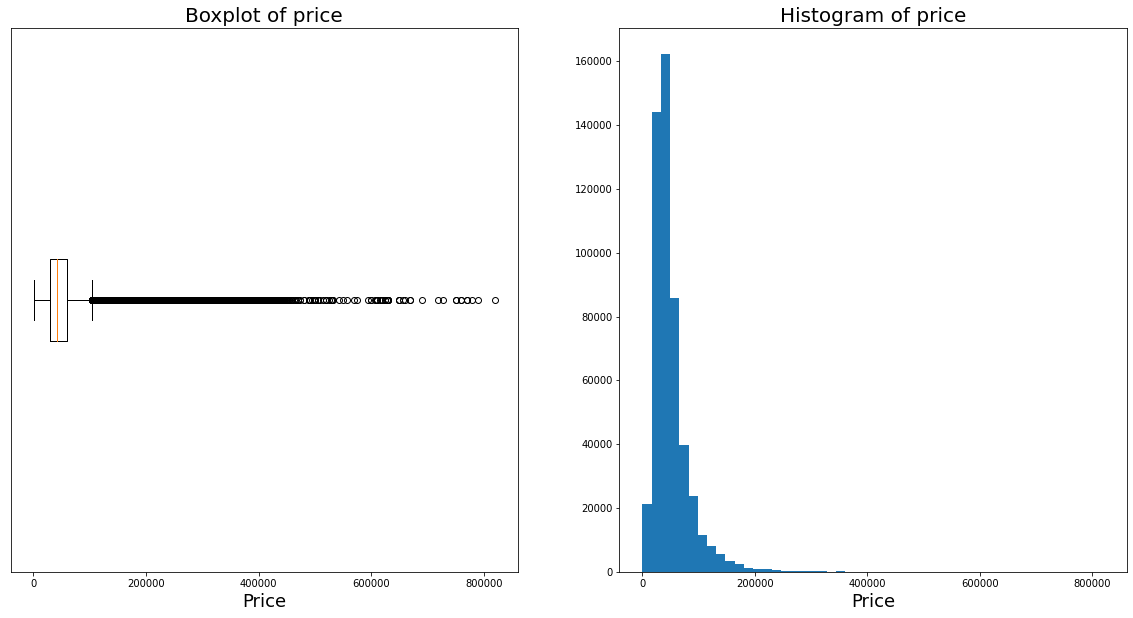

In [14]:
firstplot = plt.figure(figsize=(20,10)) # (20, 10)  사이즈의 firstplot이란 plot을 생성할거임
axes1 = firstplot.add_subplot(1, 2, 1) # 플랏을 분할할건데, 1행 2열로 분할할거고, 이건 그중 첫번째 플랏임
axes2 = firstplot.add_subplot(1, 2, 2) # 이건 그중에 두번째 플랏임

axes1.boxplot(data.price,vert=False) # 첫번째 플랏에는 boxplot을 그릴건데, 가로로 눕힐거임
axes1.set_title('Boxplot of price',fontsize=20) # 플랏 제목도 달고, 폰트 사이즈도 지정줄거임
axes1.set_xlabel('Price',fontsize=18)
axes1.get_yaxis().set_visible(False)

axes2.hist(data.price,bins=50) # 두번째 플랏은 히스토그램 그릴거임
axes2.set_title('Histogram of price', fontsize=20)
axes2.set_xlabel('Price',fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

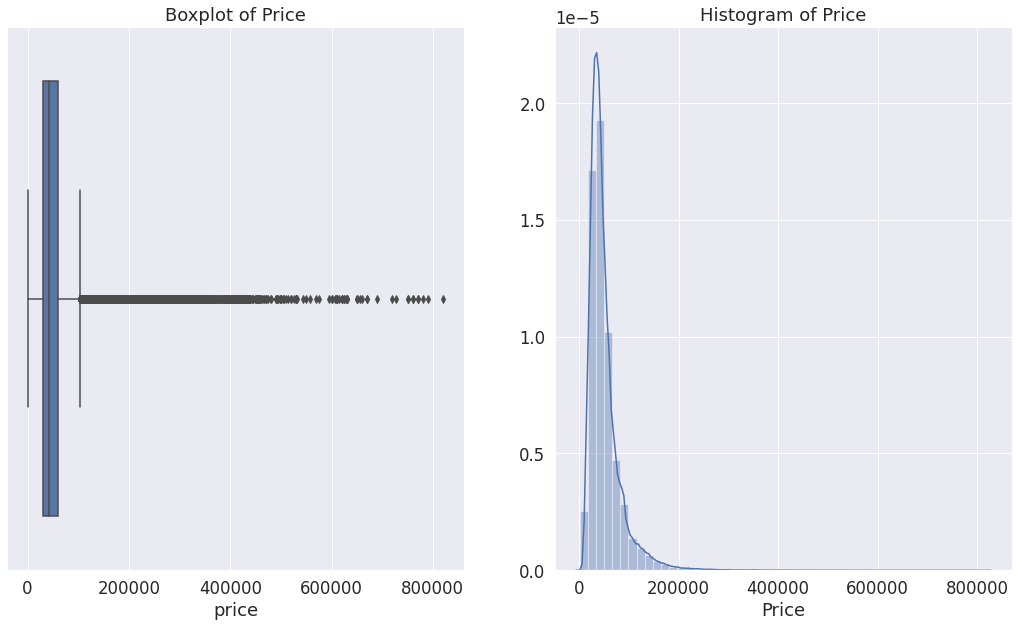

In [15]:
sns.set(font_scale = 1.5) # 폰트사이즈를 전체적으로 키워준다
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10)) #서브플랏을 1행 2열로 분할하고

ax1 = sns.boxplot(data.price, ax=axs[0])
ax2 = sns.distplot(data.price, ax=axs[1])

ax1.set_title('Boxplot of Price')
ax2.set_xlabel('Price')

ax2.set_title('Histogram of Price')
ax2.set_xlabel('Price')
ax2.set_ylabel("")

0-200000 사이에 거래가격이 주로 분포하는 걸 알 수 있습니다.

##2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인

Text(0, 0.5, 'Price')

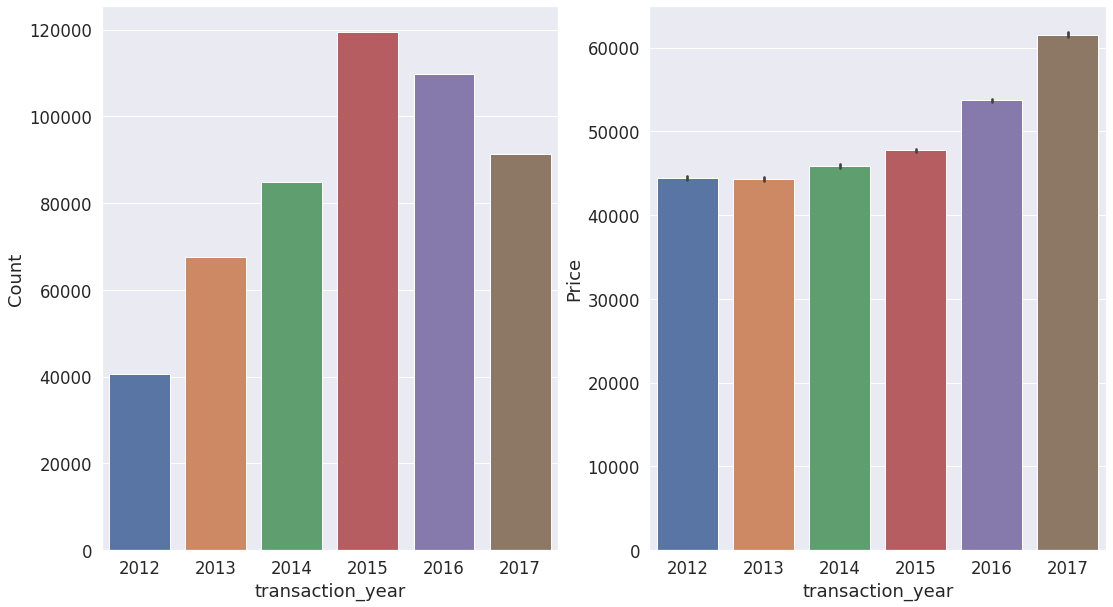

In [16]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

ax1 = sns.countplot(data=data, x='transaction_year', ax=axs[0])
ax2 = sns.barplot(data=data, x='transaction_year', y='price', ax=axs[1])

ax1.set_ylabel('Count')

ax2.set_ylabel('Price')

2015년도에 거래가 가장 많고 2017년도에 거래가격이 가장 높다는 걸 알 수 있습니다.

##2.3 층 분포 확인 / 층별 가격 분포 확인

[]

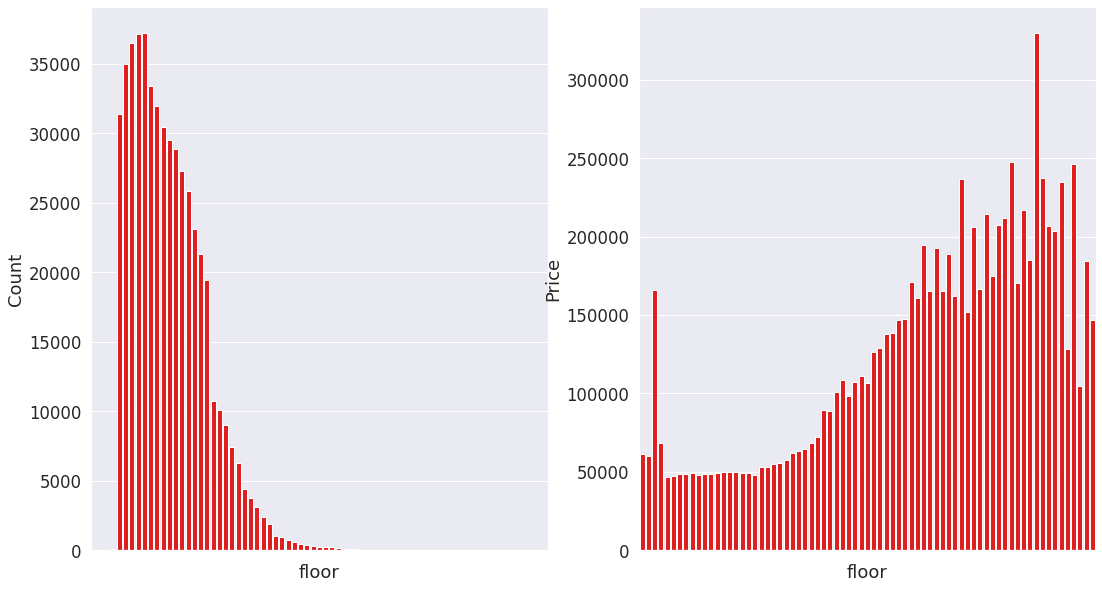

In [17]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

ax1 = sns.countplot(data=data, x='floor', ax=axs[0], color='red')
ax2 = sns.barplot(data=data, x='floor', y='price', ax=axs[1], color='red', ci=None)

ax1.set_ylabel('Count')
ax1.set_xticklabels("")

ax2.set_ylabel('Price')
ax2.set_xticklabels("")

층별 가격 분포가 오른쪽으로 치우쳐져 있는 것으로 보아 고층일수록 가격이 높아지는 경향이 있다 할 수 있습니다.

##2.4 완공연도 분포 확인 / 완공연도별 가격 분포 확인

[]

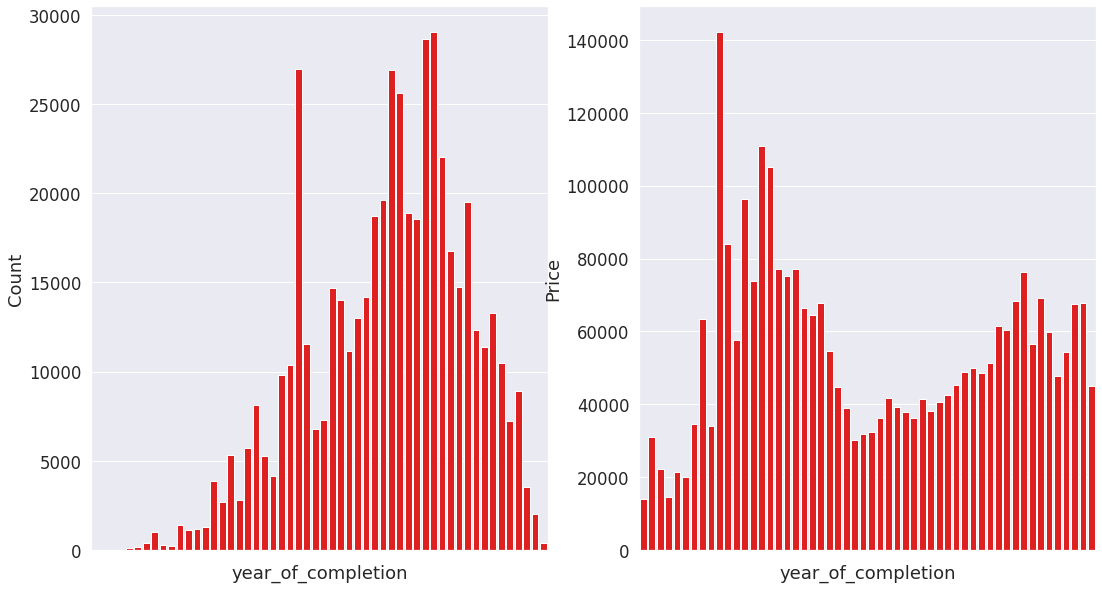

In [18]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

ax1 = sns.countplot(data=data, x='year_of_completion', ax=axs[0], color='red')
ax2 = sns.barplot(data=data, x='year_of_completion', y='price', ax=axs[1], color='red', ci=None)

ax1.set_ylabel('Count')
ax1.set_xticklabels("")

ax2.set_ylabel('Price')
ax2.set_xticklabels("")

오른쪽 가격 분포 그래프를 보아 최근 아파트라고 해서 가격이 더 비싸지는 않다는 걸 확인할 수 있습니다.

#3. 파생변수 생성

##3.1 아파트 연차 변수 생성

[]

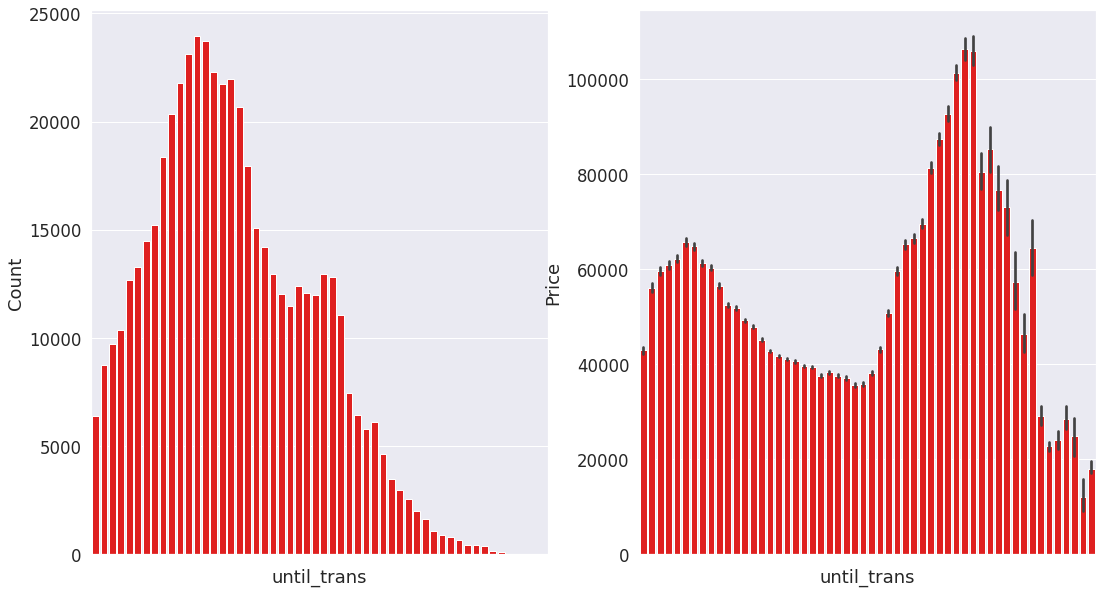

In [19]:
data['until_trans'] = data.transaction_year - data.year_of_completion + 1

fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

ax1 = sns.countplot(data=data, x='until_trans', ax=axs[0], color='red')
ax2 = sns.barplot(data=data, x='until_trans', y='price', ax=axs[1], color='red')

ax1.set_ylabel('Count')
ax1.set_xticklabels("")

ax2.set_ylabel('Price')
ax2.set_xticklabels("")

초기에는 거래가격이 높다가 연차가 오래되면 잠시 떨어지다 다시 급증하는 걸 알 수 있습니다.

##3.2 거래 일 수 변환

In [20]:
data['transaction_date'] = np.where(data.transaction_date == '1~10', 0, 
                                    np.where(data.transaction_date == '11~20', 1,2))


##3.3 월 변수와 10일 단위 변수 통합

In [21]:
data['transaction_month_date'] = 3*data.transaction_month + data.transaction_date
data

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans,transaction_month_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,2012,1,5,3
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,2012,1,5,4
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,2012,1,5,4
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,0,8,30500,2012,1,8,3
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,2,15,30500,2012,1,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513523,강일동,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,1,9,53000,2017,11,7,34
513524,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,2,12,53000,2017,11,9,35
513525,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,2,3,56500,2017,11,9,35
513526,강일동,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,2,9,55500,2017,11,9,35


##3.4 연도별 주기성을 위한 파생변수 생성 (삼각변환)

In [22]:
import math

data['sin_date'] = data['transaction_month_date'].apply(lambda x: math.sin(2*math.pi*x / 3*12))
data['cos_date'] = data['transaction_month_date'].apply(lambda x: math.cos(2*math.pi*x / 3*12))

In [23]:
data.drop(columns = ['year_of_completion', 
                    'transaction_year_month', 
                    'transaction_date', 
                    'transaction_month', 
                    'transaction_month_date'], inplace=True)

##3.5 삼각변환을 통한 장점

dummy(one-hot)을 잡거나, label인코딩을 하면 단순히 순서대로 인덱스값을 부여하지만  
삼각변환을 해주면 변수값의 주기성을 표현할 수 있다는 장점이 있습니다.





#4. 텍스트 데이터 다루기

##4.1 아파트 이름 한글부부만 뽑기

In [24]:
apt = data.apt
apt = apt.str.replace('\d|[^\w]', "") # 숫자와 특수문자 공백으로 교체
apt.head()

0    광화문풍림스페이스본
1    광화문풍림스페이스본
2    광화문풍림스페이스본
3      로얄팰리스스위트
4      로얄팰리스스위트
Name: apt, dtype: object

##4.2 아파트 이름 DTM

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(min_df = 5)
dtm = cv.fit_transform(apt)
apt_dtm = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    '빈도' : dtm.sum(axis=0).flat
})
apt_dtm

,단어,빈도
0,aaa,24
1,ags드림,7
2,airpalace,31
3,andpra레지던스,25
4,apelbaum,5
...,...,...
4043,힐탑아파트차,12
4044,힐탑이루미,24
4045,힐탑트레져동,12
4046,힐튼,5


##4.3 아파트 이름 tf-idf

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tv = TfidfVectorizer(min_df=5)
tfidf = tv.fit_transform(apt)
apt_tfidf = pd.DataFrame({
    '단어' : tv.get_feature_names(),
    '빈도' : tfidf.sum(axis=0).flat
})
apt_tfidf

,단어,빈도
0,aaa,24.0
1,ags드림,7.0
2,airpalace,31.0
3,andpra레지던스,25.0
4,apelbaum,5.0
...,...,...
4043,힐탑아파트차,12.0
4044,힐탑이루미,24.0
4045,힐탑트레져동,12.0
4046,힐튼,5.0


##4.4 질문

#5.인코딩

##5.1 원핫 인코딩

In [29]:
data = data.drop(columns= ['addr_kr'])

In [30]:
data_onehot = pd.get_dummies(data[['dong','apt']])

In [31]:
data_onehot.shape

(513528, 7094)

데이터프레임의 차원이 지나치게 커지므로 적절하지 않습니다.

##5.2 레이블(label) 인코딩 - transaction_year

In [32]:
data['transaction_year'] = data['transaction_year'].astype('category').cat.codes
data.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,70000,0,5,-2.939152e-15,1.0
1,사직동,광화문풍림스페이스본(9-0),108.55,11,100500,0,5,-3.918870e-15,1.0
2,사직동,광화문풍림스페이스본(9-0),94.51,1,65800,0,5,-3.918870e-15,1.0
3,수송동,로얄팰리스스위트,42.87,8,30500,0,8,-2.939152e-15,1.0
4,수송동,로얄팰리스스위트,39.67,15,30500,0,8,-4.898587e-15,1.0


##5.3 레이블(label) 인코딩

In [33]:
data_label = data
data_label['dong'] = data_label['dong'].astype('category').cat.codes
data_label['apt'] = data_label['apt'].astype('category').cat.codes

data_label.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,805,95.88,6,70000,0,5,-2.939152e-15,1.0
1,130,805,108.55,11,100500,0,5,-3.918870e-15,1.0
2,130,805,94.51,1,65800,0,5,-3.918870e-15,1.0
3,164,2042,42.87,8,30500,0,8,-2.939152e-15,1.0
4,164,2042,39.67,15,30500,0,8,-4.898587e-15,1.0


dong과 apt변수 내 값들에 순서가 없는데  
순서가 존재하는 숫자 값으로 표현되기 때문에 적절하지 않습니다.

##5.4 mean_encoding

In [34]:
data_mean = data
mean_apt = data_mean.groupby('apt')['price'].mean()
data_mean['apt'] = data_mean['apt'].map(mean_apt)
data_mean.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,91174.766355,95.88,6,70000,0,5,-2.939152e-15,1.0
1,130,91174.766355,108.55,11,100500,0,5,-3.918870e-15,1.0
2,130,91174.766355,94.51,1,65800,0,5,-3.918870e-15,1.0
3,164,36609.649123,42.87,8,30500,0,8,-2.939152e-15,1.0
4,164,36609.649123,39.67,15,30500,0,8,-4.898587e-15,1.0


원핫 인코딩에 비해 만들어지는 변수가 적어 차원의 저주에 걸리지 않으며 속도또한 빠릅니다.  
단점은 오버피팅이 일어날 수 있다는 겁니다.  
trainset의 mean으로만 학습된 상태인데 만약 trainset의 분포가 한쪽으로 치우쳐 있는 상태라면 오버피팅이 발생합니다.